In [2]:
import numpy as np
import pandas as pd
from scipy import spatial
import math

import seaborn as sns
import matplotlib.pyplot as plt

Best value of k is: 0.3535
Sum of Squares for k = 0.3535 is 0.061


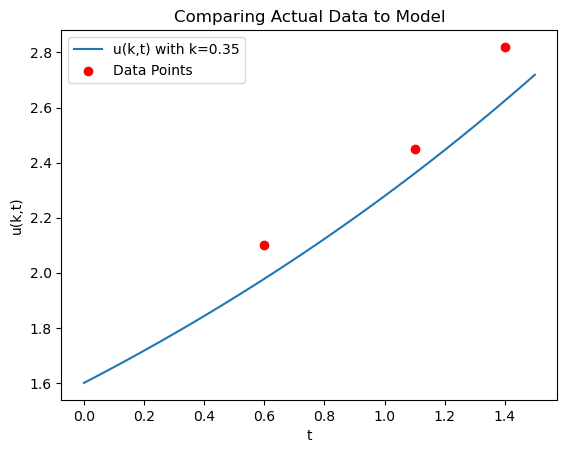

In [3]:
## PROBLEM 1.27

# Define the function u(k, t) = 1.6*(math.e)**(k*t)
def u(k, t):
    return 1.6 * math.e**(k * t)

# Known data points data structure
data_points = [{"t": 0.6, "u": 2.1},
               {"t": 1.1, "u": 2.45},
               {"t": 1.4, "u": 2.82}]

# Calculate sum of squares error for a value of k
def sum_of_squares_error(k):
    error = sum([(u(k, point["t"]) - point["u"])**2 for point in data_points])
    return error

# Find the k value that minimizes the sum of squares error
k_values = np.linspace(-5, 5, 100) # Range and granularity for k values can be adjusted
errors = [sum_of_squares_error(k) for k in k_values] # Calculate the error for each k
best_k = k_values[np.argmin(errors)] # Return best k from list of errors

print(f'Best value of k is: {round(best_k,4)}')
print(f'Sum of Squares for k = {round(best_k,4)} is {round(min(errors),4)}')

# Plot the function for best value of k and known data points
t_values = np.linspace(0, 1.5, 100)
plt.plot(t_values, u(best_k, t_values), label=f'u(k,t) with k={best_k:.2f}')
plt.scatter([point['t'] for point in data_points], [point['u'] for point in data_points], color='red', marker='o', label='Data Points')
plt.title('Comparing Actual Data to Model')
plt.xlabel('t')
plt.ylabel('u(k,t)')
plt.legend()
plt.show()

Best value of A is: 1.6838
Best value of k is: 0.3535
Sum of Squares for A = 1.6838 and k = 0.3535 is 0.0048


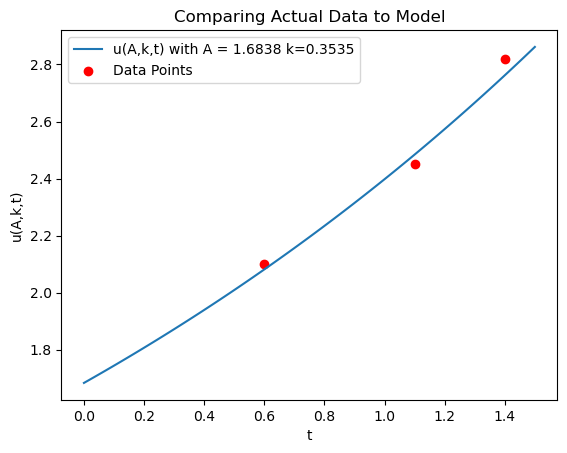

In [4]:
## PROBLEM 1.28

# Define the function u(A, k, t) = 1.6*(math.e)**(k*t)
def u(A,k, t):
    return A * math.e**(k * t)

# Known data points data structure
data_points = [{"t": 0.6, "u": 2.1},
               {"t": 1.1, "u": 2.45},
               {"t": 1.4, "u": 2.82}]

# Calculate sum of squares error for a value of k
def sum_of_squares_error(A,k):
    error = sum([(u(A,k, point["t"]) - point["u"])**2 for point in data_points])
    return error

# Find the k value that minimizes the sum of squares error
k_values = np.linspace(-5, 5, 100) # Range and granularity for k values can be adjusted
A_values = np.linspace(.1, 5, 100)
errors = np.array([[sum_of_squares_error(A,k) for k in k_values] for A in A_values]) # Calculate the error for each k

best_index = np.unravel_index(np.argmin(errors),errors.shape) # needed Chat GPT for help on his
best_A = A_values[best_index[0]] # Return best A from list of errors
best_k = k_values[best_index[1]] # Return best k from list of errors

print(f'Best value of A is: {round(best_A,4)}')
print(f'Best value of k is: {round(best_k,4)}')
print(f'Sum of Squares for A = {round(best_A,4)} and k = {round(best_k,4)} is {round(sum_of_squares_error(best_A,best_k),4)}')


# Plot the function for best value of k and known data points
t_values = np.linspace(0, 1.5, 100)
plt.plot(t_values, u(best_A,best_k, t_values), label=f'u(A,k,t) with A = {round(best_A,4)} k={round(best_k,4)}')
plt.scatter([point['t'] for point in data_points], [point['u'] for point in data_points], color='red', marker='o', label='Data Points')
plt.title('Comparing Actual Data to Model')
plt.xlabel('t')
plt.ylabel('u(A,k,t)')
plt.legend()
plt.show()

In [6]:
x = [x for x in range(0,110,10)]

In [7]:
y = [.165,1.85,2.87,3.78,4.65,5.50,6.32,7.14,7.96,8.79,9.69]

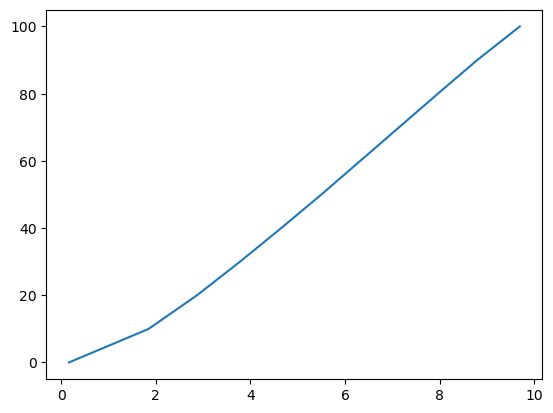

In [8]:
plt.plot(y,x)

In [13]:
years = list(np.arange(1978,2008))

ht = [0.18847,0.14974,0.21921,0.17678,0.28203,0.34528,0.20655,0.33819,0.14724,0.19757,0.23154,0.20860,0.33565,
     0.29534,0.33185,0.35039,0.28270,0.19928,0.18781,0.19357,0.18953,0.17011,0.15660,0.28179,0.25287,0.25542,0.08103,
      0.08740,0.08195,0.10518]

ut = [72148,73793,74082,92912,82323,59073,59920,48789,70638,67462,68702,61191,49599,46266,
     34877,28827,21980,17463,18057,22681,20196,25776,23796,19240,16495,12167,21104,18871,21241,22962]

In [14]:
data_table = pd.DataFrame({'year':years,'ut':ut,'ht':ht}).set_index('year')
data_table

,ut,ht
year,,
1978,72148,0.18847
1979,73793,0.14974
1980,74082,0.21921
1981,92912,0.17678
1982,82323,0.28203
1983,59073,0.34528
1984,59920,0.20655
1985,48789,0.33819
1986,70638,0.14724


In [15]:
# Change these and only these!
r = .25
K = 100000

# Set these to limit model to certain years, default tmin = 0, tmax = 30
# 0 and 30 are also the max an min values that can be input
tmin = 0
tmax = 30

In [17]:
# Given Variables
h = np.mean(ht)
u0 = ut[tmin]

# Create object to hold analytical results for ut
uta = [u0]

# Run function Loop for t = 30 years
for i in range(tmax-tmin):
    if i == 0:
        continue
    l = ((1-(h/r))*K) / (1 + np.e**(-(r-h)*i) * (((K/u0)*(1-(h/r))) - 1))
    u0 = l # Reset the u0 as l (leaving it u0 for east)
    uta.append(l) # Add to list object

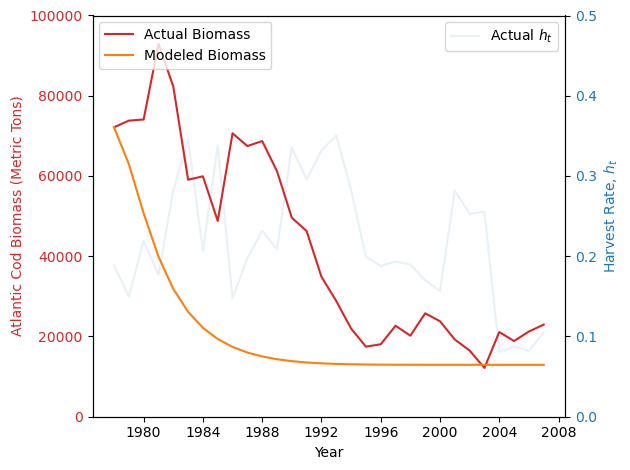

In [18]:
# Set actual data
x = years[tmin:tmax]
y1 = ut[tmin:tmax]
y1_2 = uta
y2 = ht [tmin:tmax]
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Plotting first data for the left y-axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Atlantic Cod Biomass (Metric Tons)', color=color)
ax1.plot(x, y1, color=color, label='Actual Biomass')
ax1.tick_params(axis='y', labelcolor=color)

# Plotting second data for the left y-axis
color = 'tab:orange'
ax1.plot(x, y1_2, color=color, label='Modeled Biomass')
ax1.set_ylim(0, 100000)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Harvest Rate, $h_t$', color=color)
ax2.plot(x, y2, color=color, label='Actual $h_t$', alpha=.1)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 0.5)

fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

In [21]:
def pgraph(r,k,tmin,tmax):
    # Data
    years = list(np.arange(1978,2008))

    ht = [0.18847,0.14974,0.21921,0.17678,0.28203,0.34528,0.20655,0.33819,0.14724,0.19757,0.23154,0.20860,0.33565,
     0.29534,0.33185,0.35039,0.28270,0.19928,0.18781,0.19357,0.18953,0.17011,0.15660,0.28179,0.25287,0.25542,0.08103,
      0.08740,0.08195,0.10518]

    ut = [72148,73793,74082,92912,82323,59073,59920,48789,70638,67462,68702,61191,49599,46266,
     34877,28827,21980,17463,18057,22681,20196,25776,23796,19240,16495,12167,21104,18871,21241,22962]
    
    # Given Variables
    h = .4 #np.mean(ht)
    u0 = ut[tmin]

    # Create object to hold analytical results for ut
    uta = [u0]

    # Run function Loop for t = 30 years
    for i in range(tmax-tmin):
        if i == 0:
            continue
        l = ((1-(h/r))*K) / (1 + np.e**(-(r-h)*i) * (((K/u0)*(1-(h/r))) - 1))
        u0 = l # Reset the u0 as l (leaving it u0 for east)
        uta.append(l) # Add to list object
    
    # Graphing
    # Set actual data
    x = years[tmin:tmax]
    y1 = ut[tmin:tmax]
    y1_2 = uta
    y2 = ht [tmin:tmax]
    # Create a figure and a set of subplots
    fig, ax1 = plt.subplots()
    ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Plotting first data for the left y-axis
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Atlantic Cod Biomass (Metric Tons)', color=color)
    ax1.plot(x, y1, color=color, label='Actual Biomass')
    ax1.tick_params(axis='y', labelcolor=color)

    # Plotting second data for the left y-axis
    color = 'tab:orange'
    ax1.plot(x, y1_2, color=color, label='Modeled Biomass')
    ax1.set_ylim(0, 100000)

    # Create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Harvest Rate, $h_t$', color=color)
    ax2.plot(x, y2, color=color, label='Actual $h_t$', alpha=.1)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 0.5)

    # Output
    fig.tight_layout()
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.show()

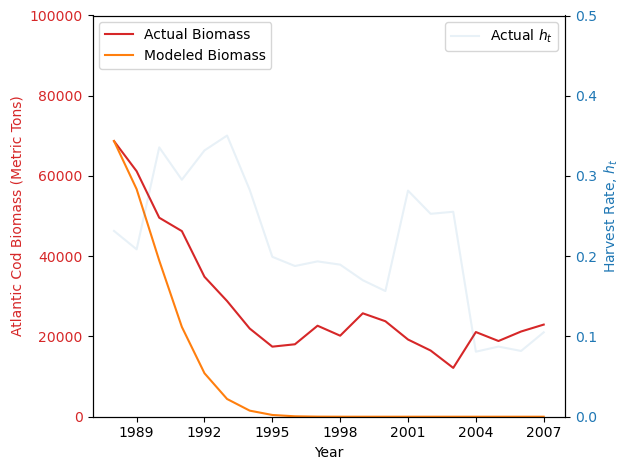

In [22]:
r = .2222
K = 1000000
tmin = 10
tmax = 30

pgraph(r,K,tmin,tmax)

In [23]:
def expo(k,t):
    return 1.6*math.e**(k*t)

In [24]:
ex_data = [{.6:2.1,1.1:2.45,1.4:2.82}]
time_data = [.6,1.1,1.4]
dist_data = [2.1,2.45,2.82]

In [25]:
ex_data[0][.6]

2.1

In [26]:
results = []
ks = []

for i in range(1000):
    k = i/1000
    term1 = expo(k,time_data[0])
    term2 = expo(k,time_data[1])
    term3 = expo(k,time_data[2])
    
    result = (term1 - dist_data[0])**2 + (term2 - dist_data[1])**2 + (term3 - dist_data[2])**2
    
    ks.append(k)
    results.append(result)

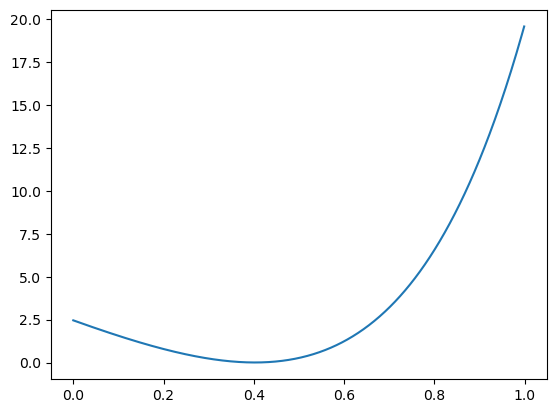

In [27]:
plt.plot(ks,results)